In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread

In [2]:
dir_labels = "F:/ml_datasets/RUG/htsm_masterwork/oil-spill-detection-dataset/train/labels_1D/"

In [3]:
dir_labels = os.path.normpath(dir_labels)
print(f"Label files are read from the directory: {dir_labels}")

Label files are read from the directory: F:\ml_datasets\RUG\htsm_masterwork\oil-spill-detection-dataset\train\labels_1D


In [4]:
list_label_files = os.listdir(dir_labels)
num_label_files = len(list_label_files)

In [5]:
print(f"Number of label files : {num_label_files}")

Number of label files : 1002


In [6]:
dict_label_mapping = {
    0: "Sea Surface",
    1: "Oil Spill",
    2: "Look-alike",
    3: "Ship",
    4: "Land",
}

In [7]:
label = imread(os.path.join(dir_labels, list_label_files[6]))

In [8]:
dict_class_counts = {}

In [9]:
for file_label in list_label_files:
    label = imread(os.path.join(dir_labels, file_label))
    unique, unique_counts = np.unique(label, return_counts=True)
    
    for key, value in zip(unique, unique_counts):
        if key in dict_class_counts.keys():
            dict_class_counts[key] += value
        else:
            dict_class_counts[key] = 0

In [10]:
dict_class_counts

{0: 716076294, 1: 8190158, 2: 45822439, 3: 345916, 4: 42461741}

In [11]:
expr = r"$\times 10^3$"

c:\users\abhishek\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


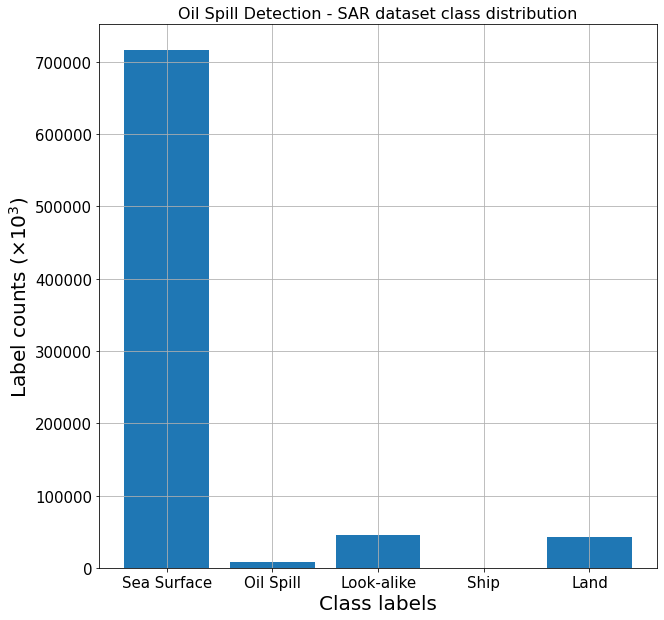

In [12]:
fig = plt.figure(figsize=(10, 10))
plt.bar(list(dict_label_mapping.values()), np.array(list(dict_class_counts.values())) / 1000)
plt.grid()
plt.title("Oil Spill Detection - SAR dataset class distribution", fontsize=16)
plt.xlabel("Class labels", fontsize=20)
plt.ylabel(f"Label counts ({expr})", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
fig.show()